In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dat=np.load('/home/maria/MouseViT2/src/glm_weights_natural_images.npy')

In [15]:
import numpy as np
import json
from torchvision.models import resnet50, ResNet50_Weights

# Step 1: Load your GLM weights
dat = np.load('/home/maria/MouseViT2/src/glm_weights_natural_images.npy')[:5, :]  # shape (n_neurons, 1000)

# Step 2: Get ImageNet class names from torchvision weights enum
weights_enum = ResNet50_Weights.IMAGENET1K_V1
imagenet_classes = weights_enum.meta['categories']  # list of 1000 class names

# Step 3: Extract nonzero entries per neuron
def get_nonzero_class_labels(weights_matrix, class_names):
    neuron_labels = []
    for i, row in enumerate(weights_matrix):
        nonzero_indices = np.nonzero(row)[0]
        nonzero_labels = [class_names[idx] for idx in nonzero_indices]
        neuron_labels.append({
            "neuron_id": i,
            "nonzero_class_indices": nonzero_indices.tolist(),
            "nonzero_class_names": nonzero_labels
        })
    return neuron_labels

# Step 4: Run the function
labels_per_neuron = get_nonzero_class_labels(dat, imagenet_classes)

# Optional: Print some example neurons
for neuron in labels_per_neuron:
    print(f"Neuron {neuron['neuron_id']}:")
    print("  Semantic categories:", neuron["nonzero_class_names"])
    print()


Neuron 0:
  Semantic categories: []

Neuron 1:
  Semantic categories: ['barber chair', 'convertible', 'limousine', 'shoe shop']

Neuron 2:
  Semantic categories: ['tobacco shop']

Neuron 3:
  Semantic categories: []

Neuron 4:
  Semantic categories: ['bloodhound', 'ashcan', 'barber chair', 'barbershop', 'bookshop', 'cab', 'confectionery', 'convertible', 'fur coat', 'gas pump', 'golfcart', 'joystick', 'lab coat', 'limousine', 'Model T', 'projector', 'racer', 'shoe shop', 'television', 'tobacco shop', 'toyshop', 'trailer truck', 'trench coat']



In [5]:
dat.shape

(213, 1000)

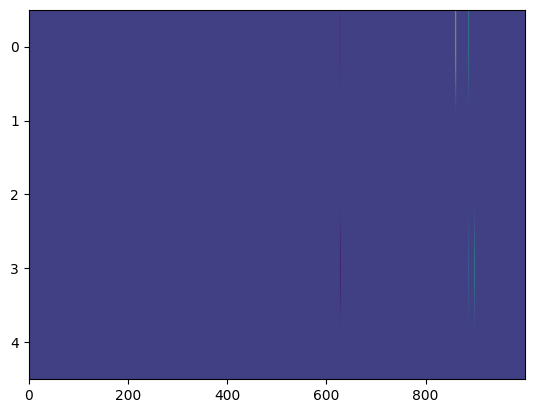

In [7]:
plt.imshow(dat[:5], aspect='auto')

In [8]:
dat[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])